In [1]:
# MIDTERM PROJECT;
# Ori Yarden;
# Methods in Complex Systems;
# ISC6450-001;
# 3/2/2021;

In [3]:
# Import Everything [for organizational purposes];
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy import signal
from skimage import io as io

# Specifically Animation Stuff;
import torch.nn.functional as F
from torch.nn.functional import *
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import time
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

In [4]:
# Initialize Plot Parameters [for organizational purposes];
plotDimensionSize = 20
plotTitleFontSize = 50
plotGridSize20 = 20
plotGridSize10 = 10
plotGridSize3 = 3
plotGridSize100 = 100
RGB = 3

In [5]:
# Define Plot;
plotTitle = 'Insert Variable Name'
def plot(this):
    fig = plt.figure(figsize = (plotDimensionSize,plotDimensionSize))
    plt.gca().set_title("plot" + '  ' + plotTitle,fontsize = plotTitleFontSize,fontweight = 'bold')
    plt.imshow(this)
    plt.axis('off')
    plt.axis('tight')

In [6]:
# Define Plot Gray Scale [G.S.];
plotTitle = 'Insert Variable Name'
def plotGrayScale(this):
    fig = plt.figure(figsize = (plotDimensionSize,plotDimensionSize))
    imGrayScaled = plt.imshow(this, cmap = 'gray')
    plt.gca().set_title("plot G.S." + '  ' + plotTitle,fontsize = plotTitleFontSize,fontweight = 'bold')
    plt.axis('off')
    plt.axis('tight')
    plt.show(imGrayScaled)

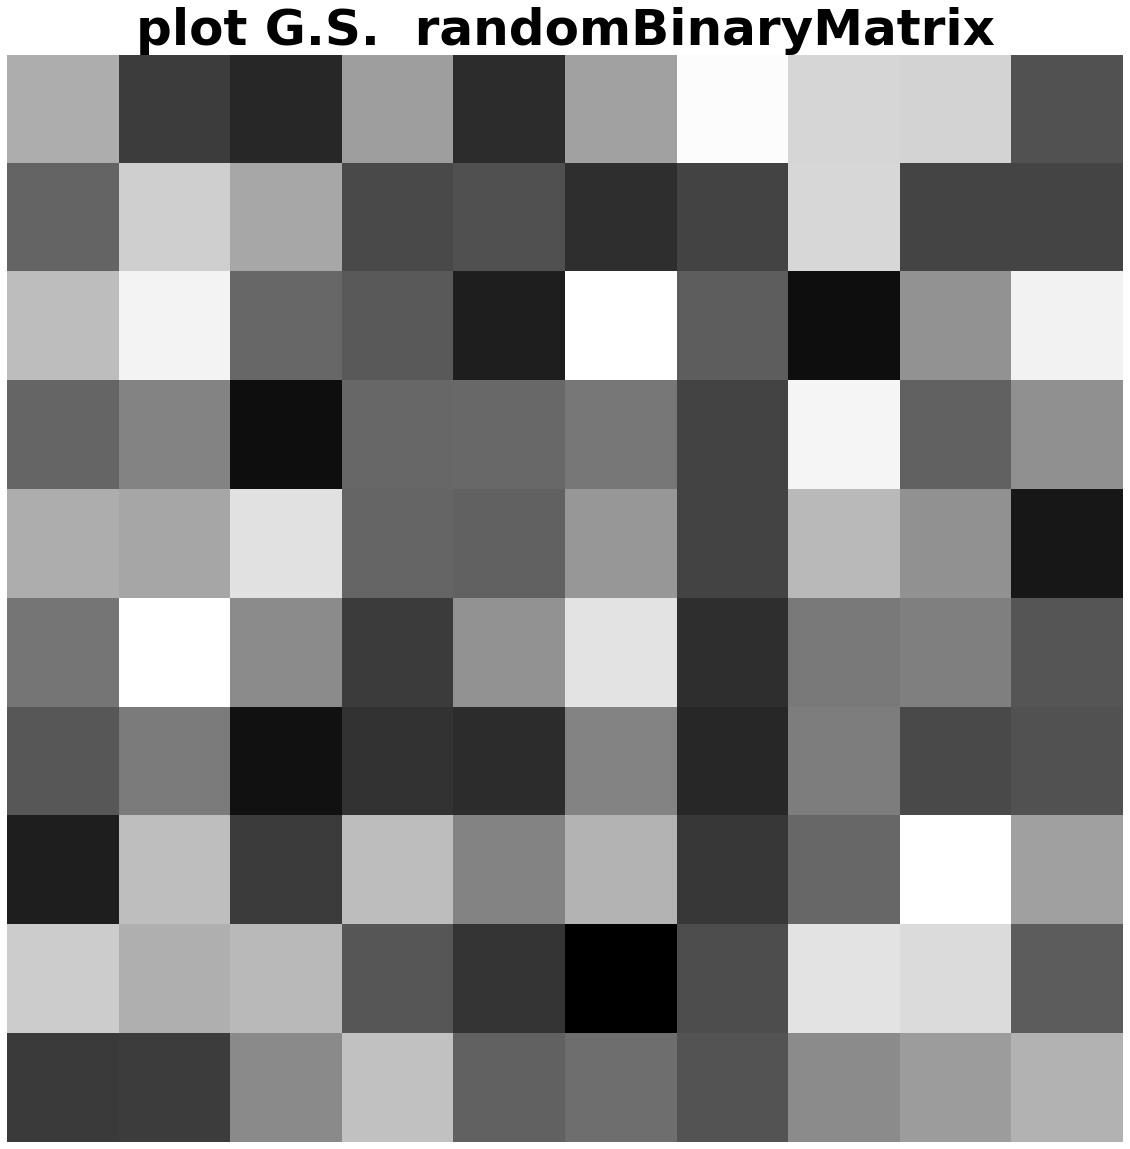

In [7]:
# Plot Random Binary Image 10x10;
randomBinaryMatrix = np.random.random((plotGridSize10,plotGridSize10,RGB))
randomBinaryMatrix = np.mean(randomBinaryMatrix, axis = 2)
plotTitle = 'randomBinaryMatrix'
plotGrayScale(randomBinaryMatrix)

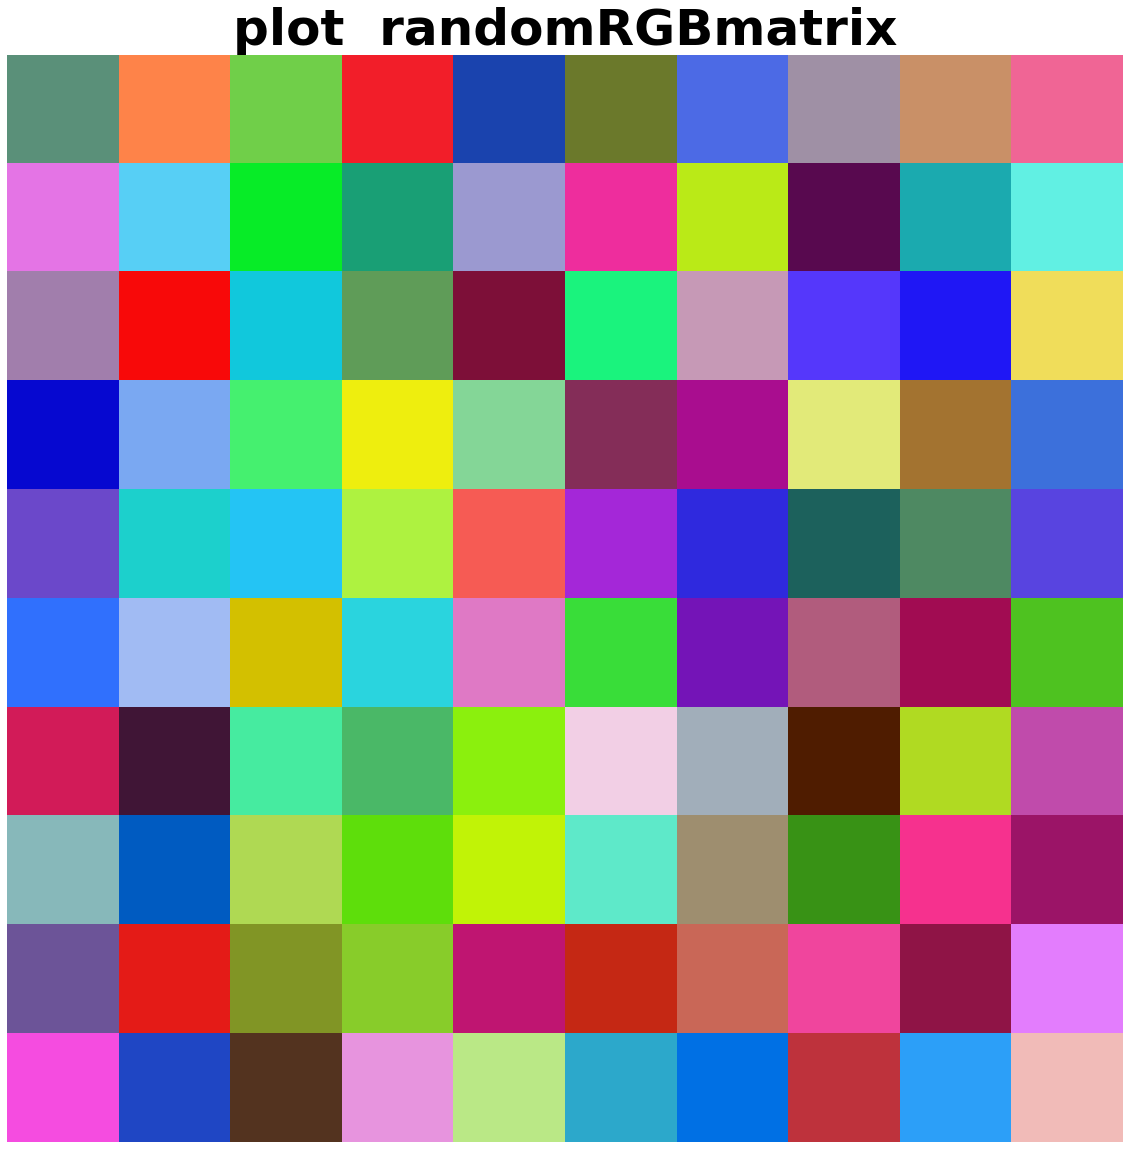

In [8]:
# Plot Random RGB Image 10x10;
randomRGBmatrix = np.random.random((plotGridSize10,plotGridSize10,RGB))
plotTitle = 'randomRGBmatrix'
plot(randomRGBmatrix)

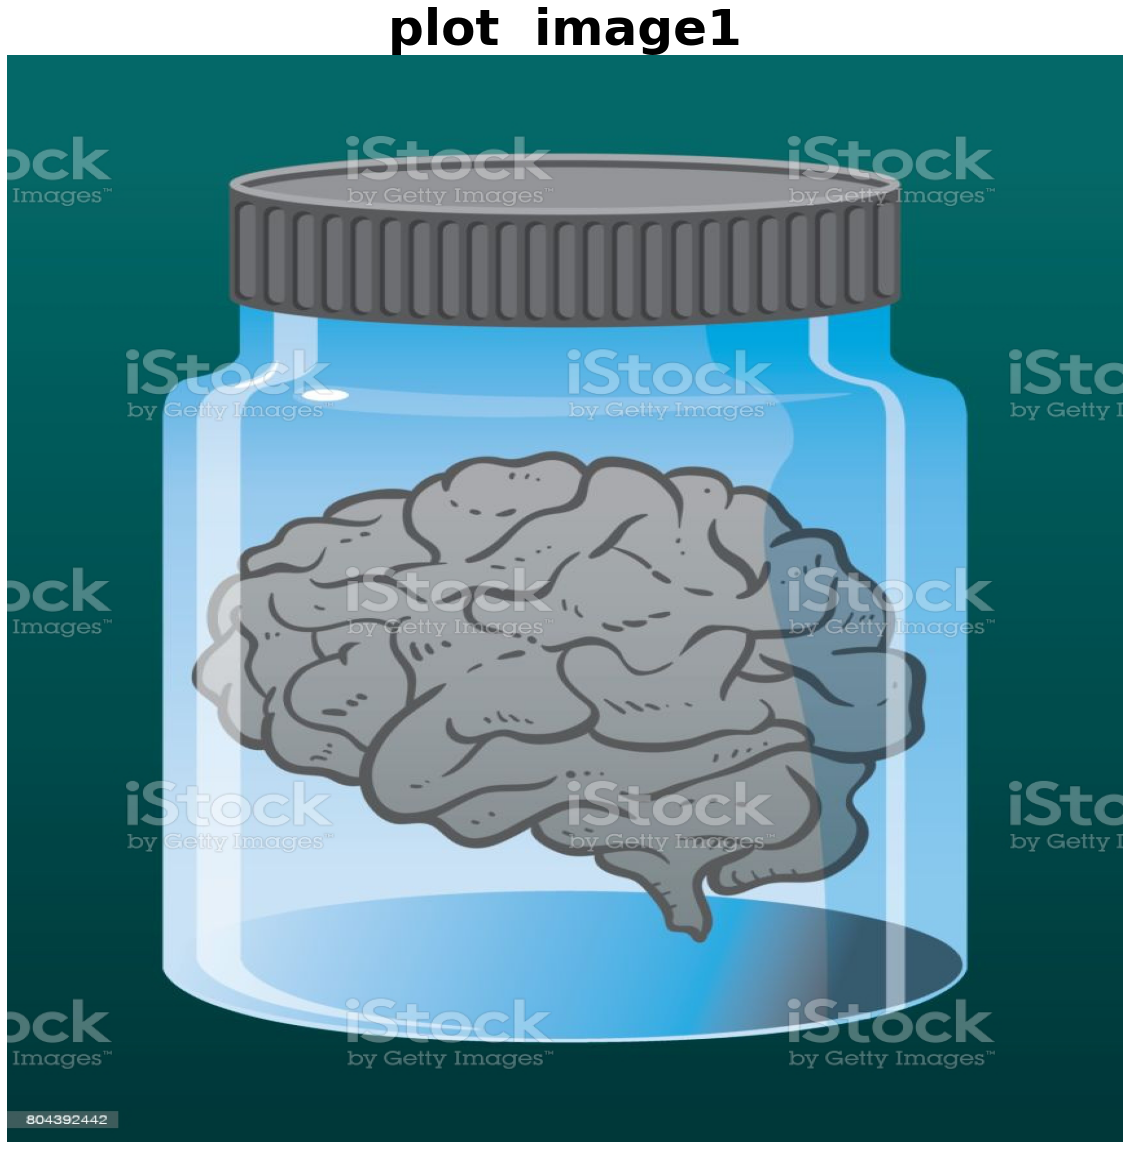

In [9]:
# Link to Image;
linkToImage1 = "https://media.istockphoto.com/vectors/brain-inside-jar-vector-id804392442"
# Read Image Link;
image1 = io.imread(linkToImage1)
# Plot Image;
plotTitle = 'image1'
plot(image1)

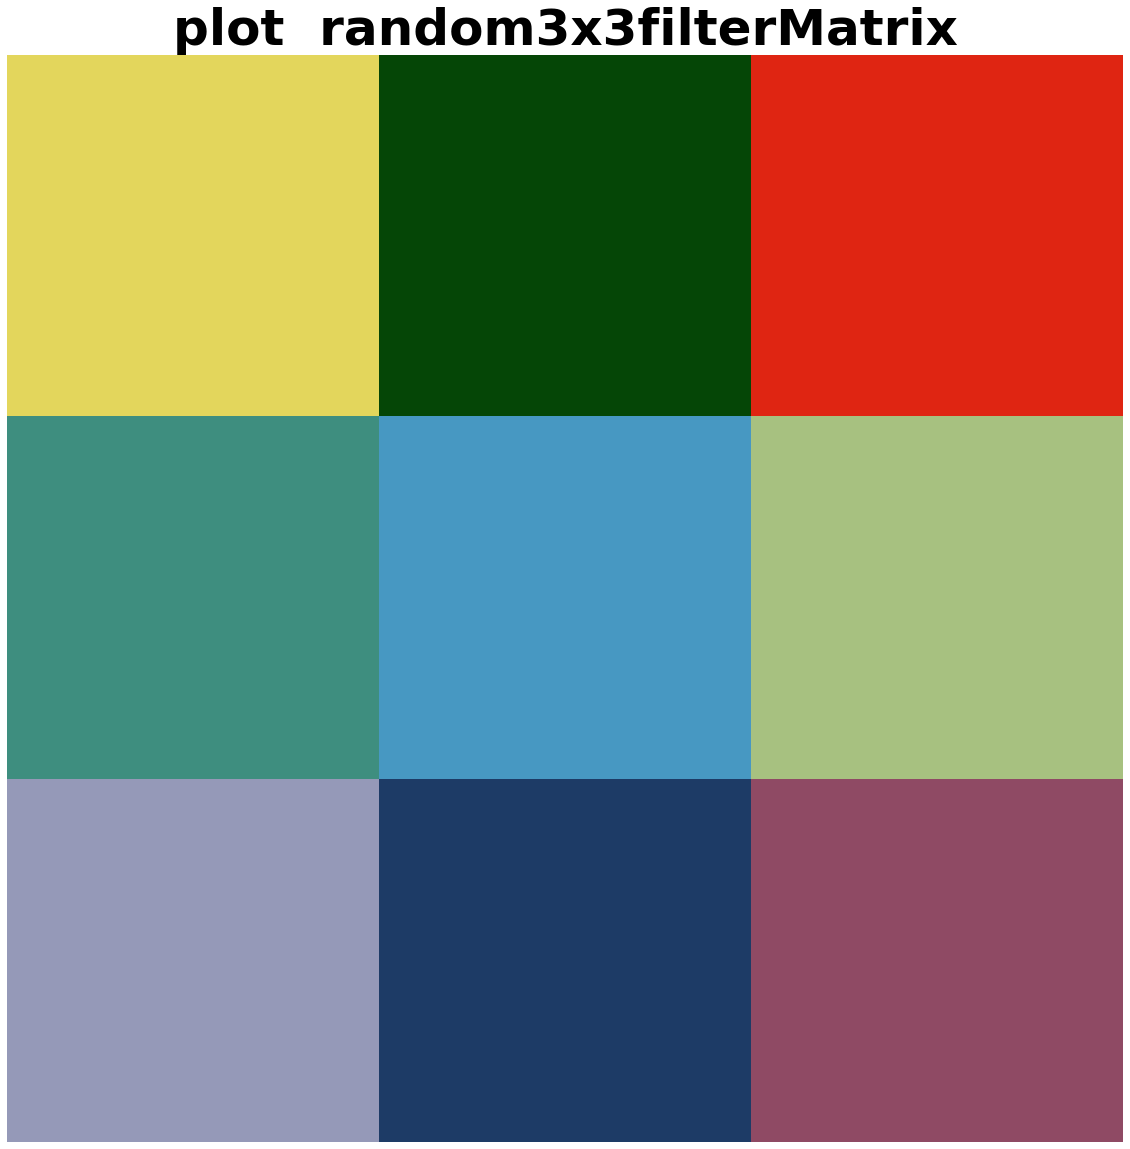

In [10]:
# Generate Random 3x3 Filter Matrix;
random3x3filterMatrix = np.random.random((plotGridSize3,plotGridSize3,RGB))
# Plot Random 3x3 Filter Matrix;
plotTitle = 'random3x3filterMatrix'
plot(random3x3filterMatrix)

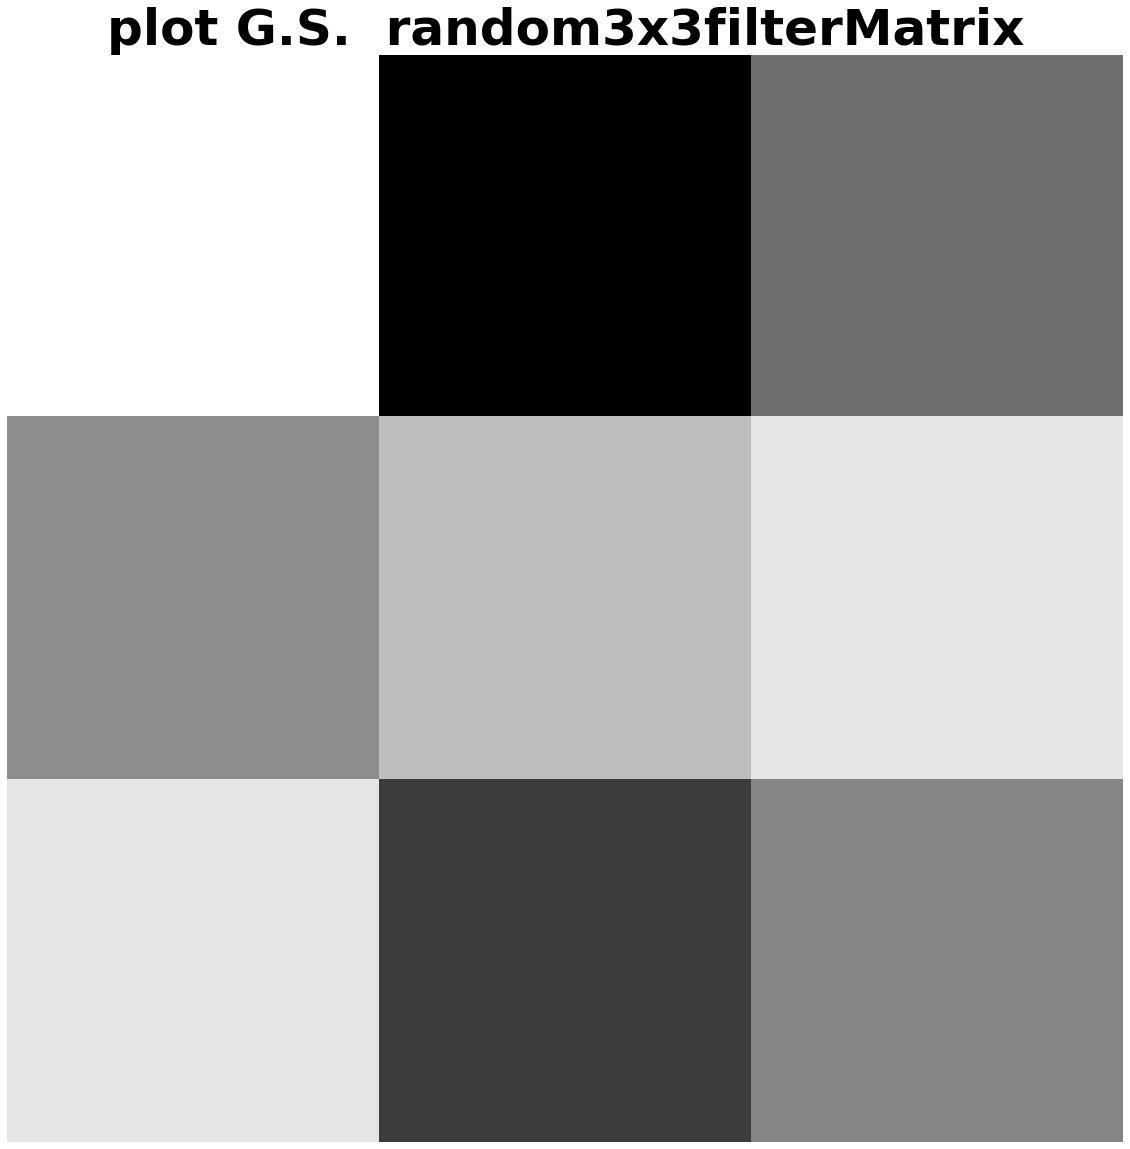

In [11]:
# Convert Random 3x3 Filter Matrix to GrayScale;
random3x3filterMatrixGS = np.mean(random3x3filterMatrix, axis = 2)
# Plot GrayScale Random 3x3 Filter Matrix;
plotTitle = 'random3x3filterMatrix'
plotGrayScale(random3x3filterMatrixGS)

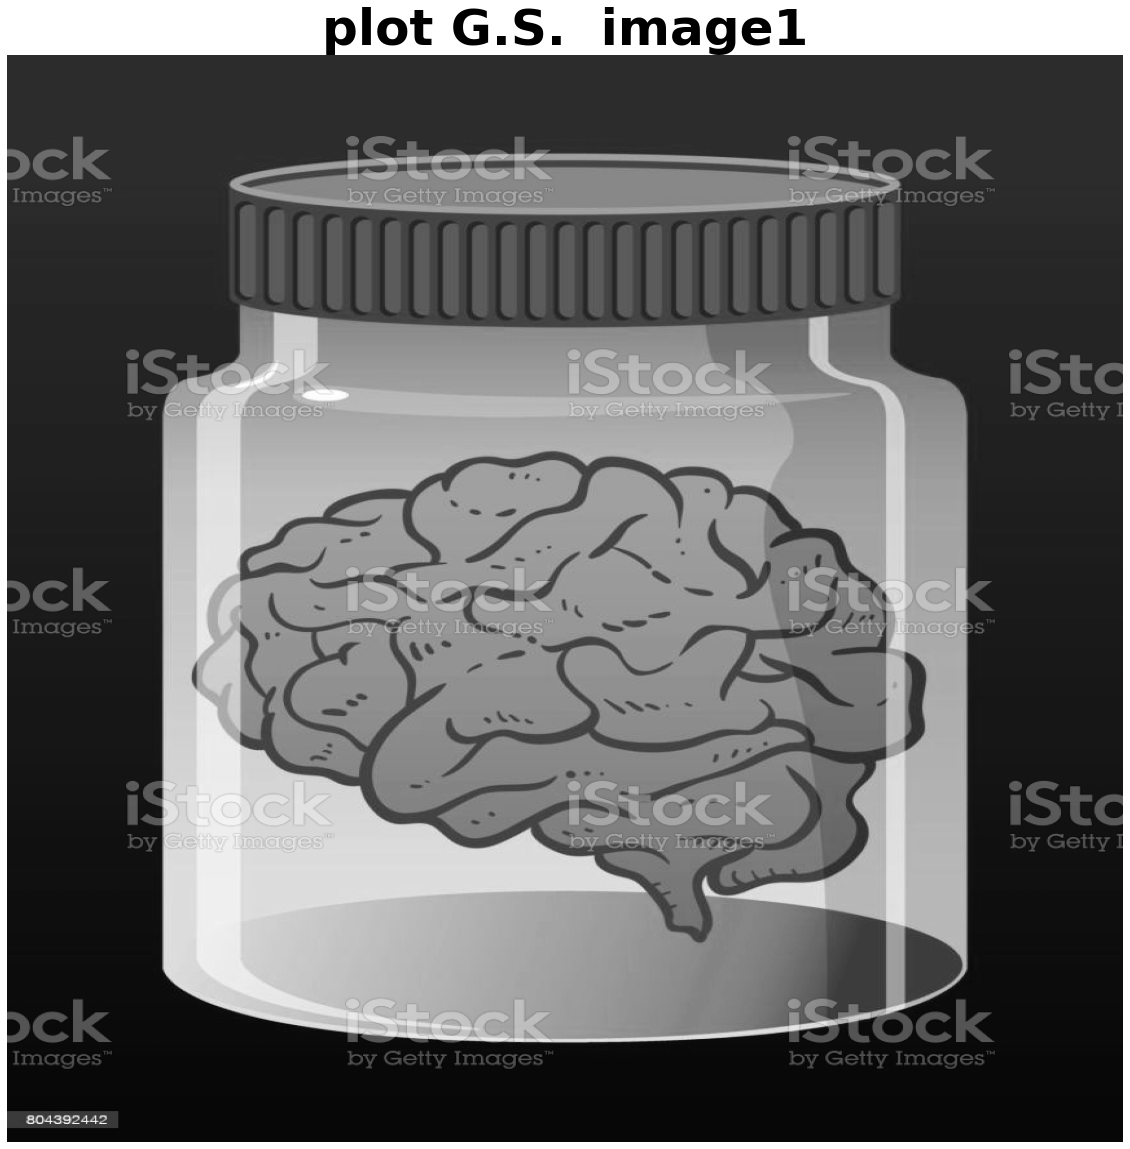

In [12]:
# Convert Image to GrayScale;
image1GS = np.mean(image1, axis = 2)
# Plot GrayScale Image;
plotTitle = 'image1'
plotGrayScale(image1GS)

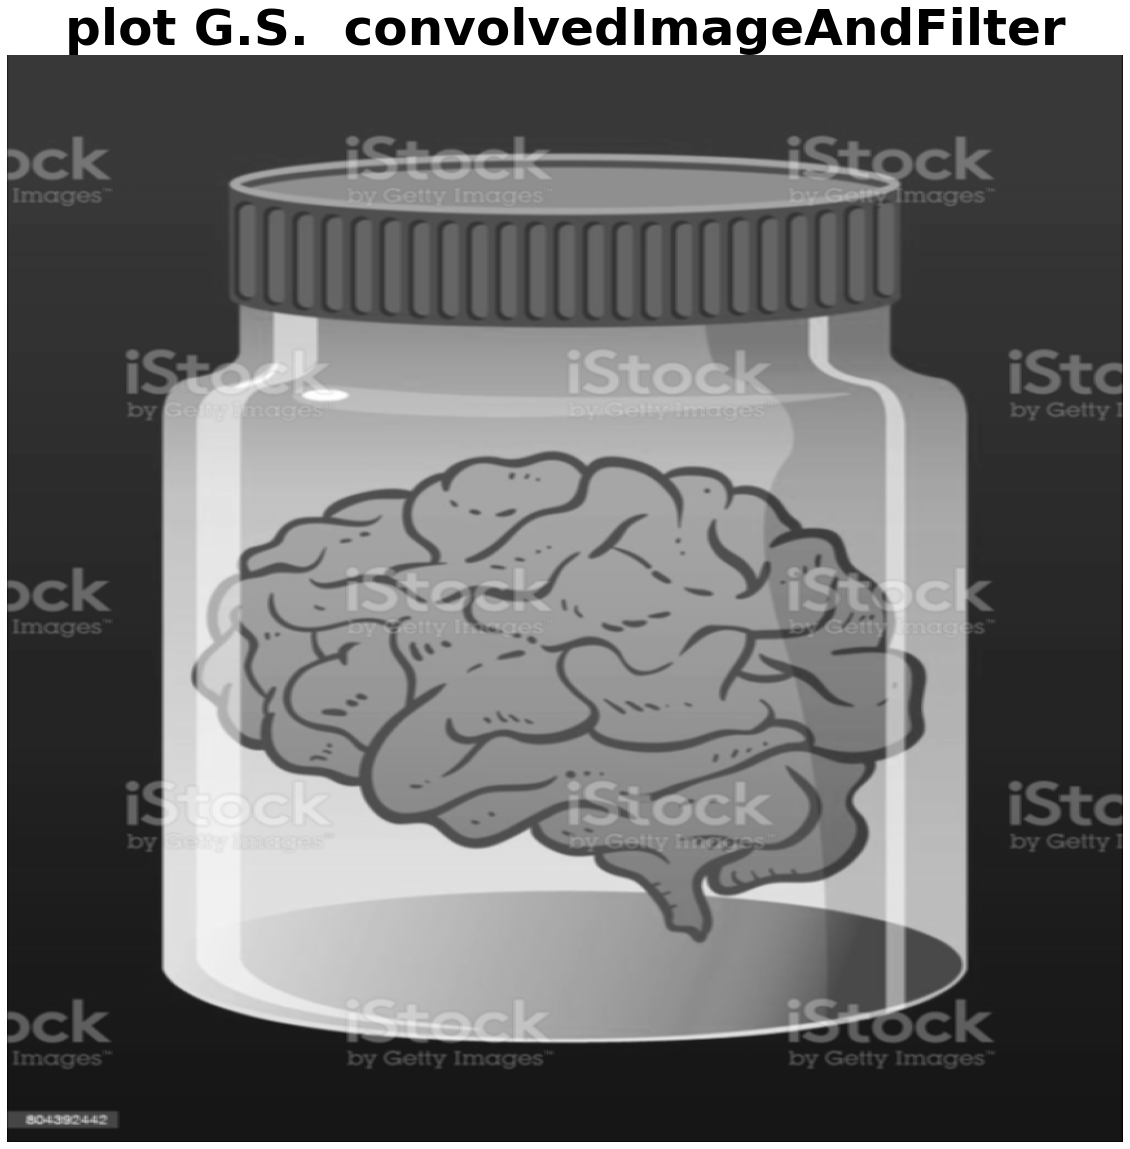

In [13]:
# Convolve GrayScale Image With GrayScale Random 3x3 Filter Matrix;
convolvedImageAndFilter = signal.convolve2d(image1GS, random3x3filterMatrixGS, mode = 'same')
# Plot Convolution;
plotTitle = 'convolvedImageAndFilter'
plotGrayScale(convolvedImageAndFilter)

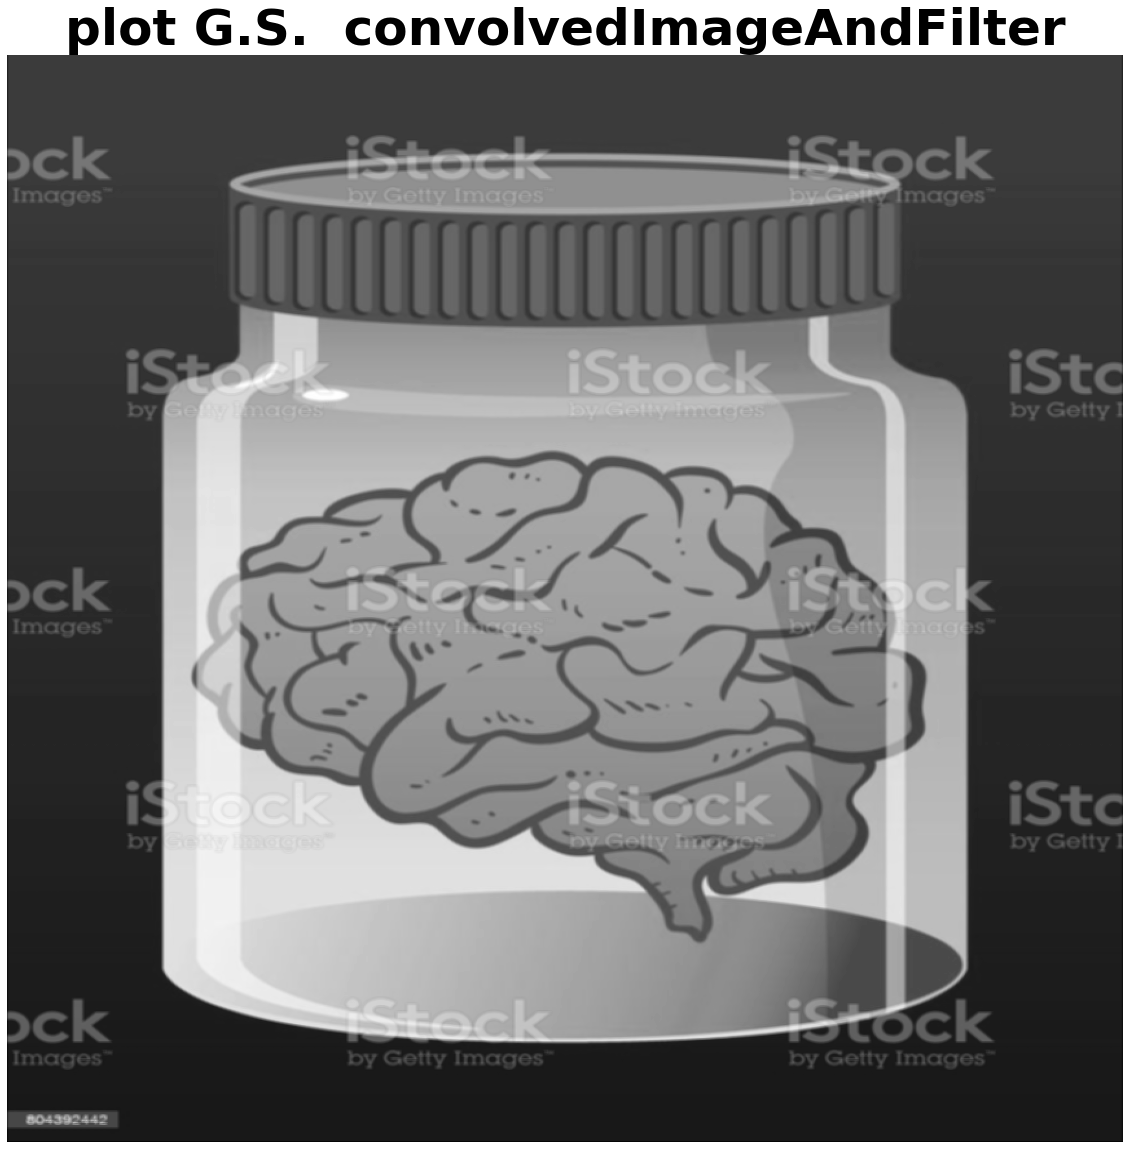

In [14]:
# Transpose GrayScale Random 3x3 Filter Matrix;
random3x3filterMatrixGS_Transposed = np.transpose(random3x3filterMatrixGS)
# Convolve GrayScale Image with Transposed GrayScale Random 3x3 Filter Matrix;
convolvedImageAndFilter = signal.convolve2d(image1GS, random3x3filterMatrixGS_Transposed, mode = 'same')
# Plot Convolution;
plotTitle = 'convolvedImageAndFilter'
plotGrayScale(convolvedImageAndFilter)

In [15]:
# For Loop to Define Convolve Function [as opposed to using the signal.convolve2d() built-in function previously used to plot convolution];
def convolutionFunction(inputValuesFromImage, inputValuesFromFilter):
    convolvedImage = np.zeros(inputValuesFromImage.shape)
    for i in range(1, inputValuesFromImage.shape[0] - 1):
        for j in range(1, inputValuesFromImage.shape[1] - 1):
        
            convolvedImage[i, j] = inputValuesFromFilter[0, 0] * inputValuesFromImage[i - 1, j - 1]  \
            +         inputValuesFromFilter[0, 1] * inputValuesFromImage[i - 1, j]    \
            +         inputValuesFromFilter[0, 2] * inputValuesFromImage[i - 1, j + 1]  \
            +         inputValuesFromFilter[1, 0] * inputValuesFromImage[i, j - 1]    \
            +         inputValuesFromFilter[1, 1] * inputValuesFromImage[i, j]      \
            +         inputValuesFromFilter[1, 2] * inputValuesFromImage[i, j + 1]    \
            +         inputValuesFromFilter[2, 0] * inputValuesFromImage[i + 1, j - 1]  \
            +         inputValuesFromFilter[2, 1] * inputValuesFromImage[i + 1, j]    \
            +         inputValuesFromFilter[2, 2] * inputValuesFromImage[i + 1, j + 1]
            
    return convolvedImage

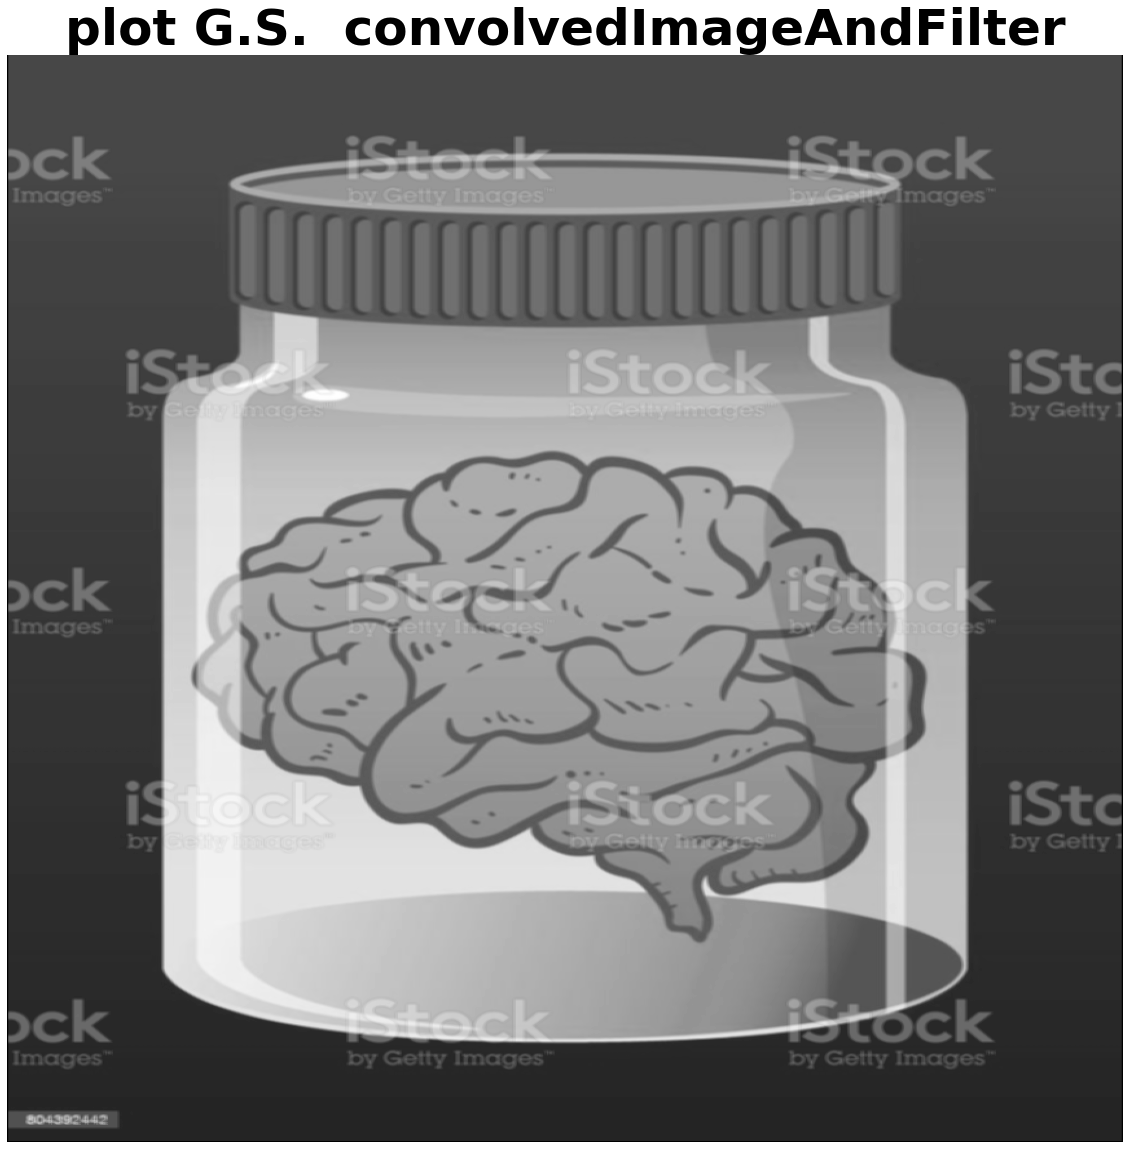

In [16]:
# Convolve [FUNCTION] GrayScale Image with GrayScale Random 3x3 Filter Matrix;
convolvedImageAndFilter = convolutionFunction(image1GS, random3x3filterMatrixGS)
# Plot Convolution;
plotTitle = 'convolvedImageAndFilter'
plotGrayScale(convolvedImageAndFilter)

In [19]:
# Scaling Function;
def scalingFunction(this):
    return (this - np.min(this)) / (np.max(this) - np.min(this))

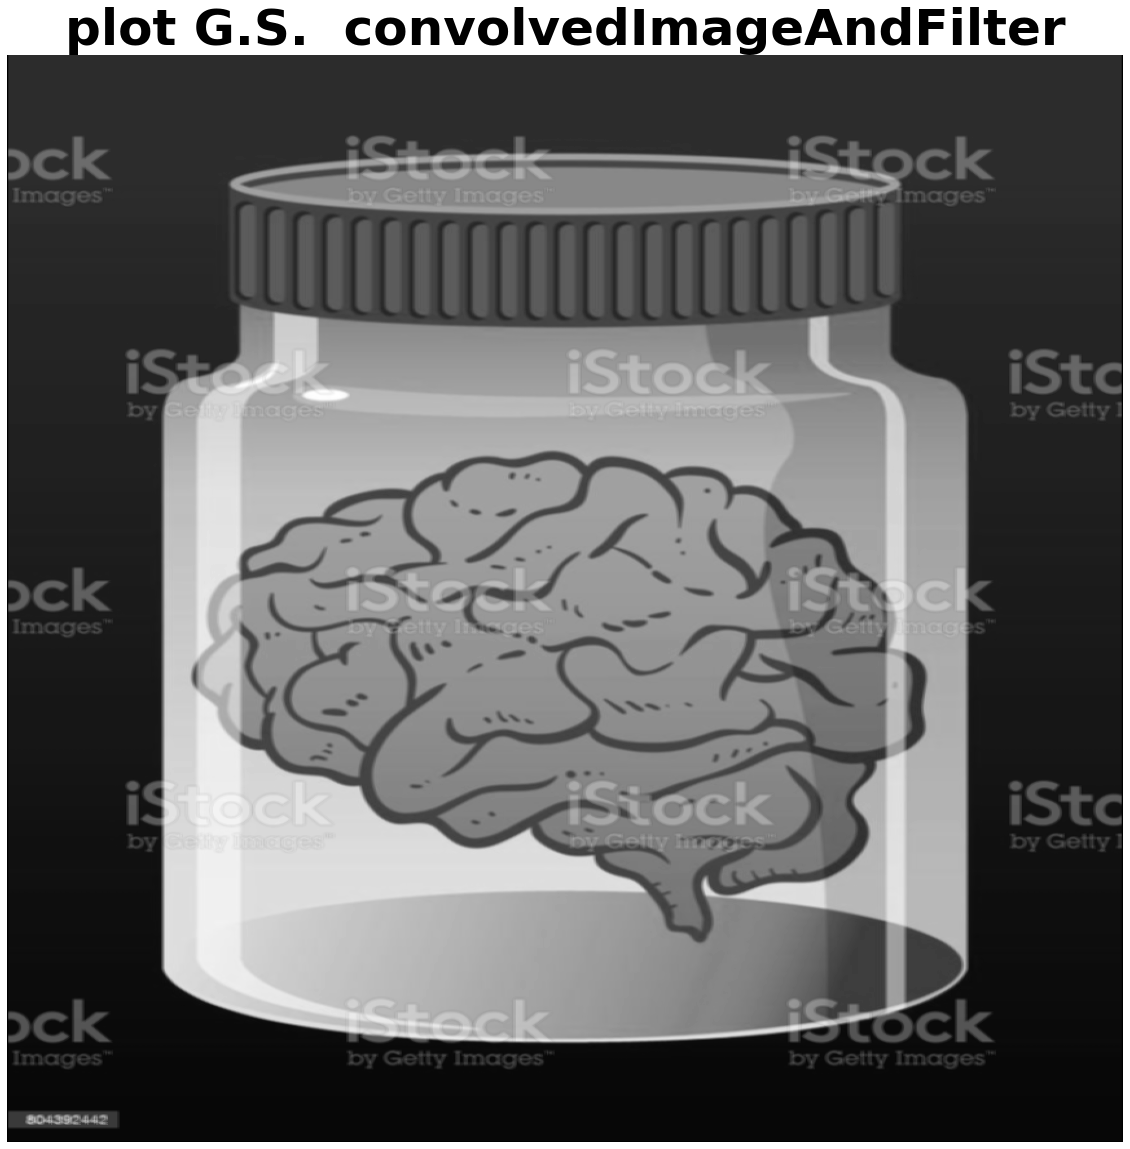

In [20]:
# Apply Scale Function to GrayScale Image & GrayScale Random 3x3 Filter Matrix;
Scaled_image1GS = scalingFunction(image1GS)
Scaled_random3x3filterMatrixGS = scalingFunction(random3x3filterMatrixGS)
# Convolve [FUNCTION] GrayScale Image with GrayScale Random 3x3 Filter Matrix;
convolvedImageAndFilter = convolutionFunction(Scaled_image1GS, Scaled_random3x3filterMatrixGS)
# Plot Convolution;
plotTitle = 'convolvedImageAndFilter'
plotGrayScale(convolvedImageAndFilter)

In [21]:
# Define Animation Function A;
def plotAnimation(Frames, colormap = 'gray'):
    fig = plt.figure(figsize = (plotDimensionSize,plotDimensionSize))
    imGrayScaled = plt.imshow(Frames[0, :, :], cmap = colormap)
    #im = ax.imshow(A[0,:,:], cmap = colormap);'
    plt.gca().set_title("plot G.S." + '  ' + plotTitle,fontsize = plotTitleFontSize,fontweight = 'bold')
    plt.axis('off')
    plt.axis('tight')
    plt.show(imGrayScaled)

    def animate(data, imGrayScaled):
        imGrayScaled.set_data(data)

    def step():
        for i in range(Frames.shape[0]):
            data = Frames[i,:,:]
            yield data

    return animation.FuncAnimation(fig, animate, step, interval = 100, repeat = True, fargs = (imGrayScaled,))

In [22]:
# Define Convolution Function for Animation;
def convolutionAnimationFunction(worldGrid, filterGrid): #GPU conv with padding

    n = conv2d(worldGrid.type(torch.int),filterGrid.type(torch.int))
    n = pad(n, (1, 1, 1, 1)) #add ones to the sides of the matrix

    return n

In [23]:
# Generate Game of Life World Grid;
worldGrid = (np.random.random((plotGridSize100, plotGridSize100)) > 0.5) #game of life world grid w
filterGrid = np.matrix([[1, 1, 1], [1, 0, 1], [1, 1, 1]])

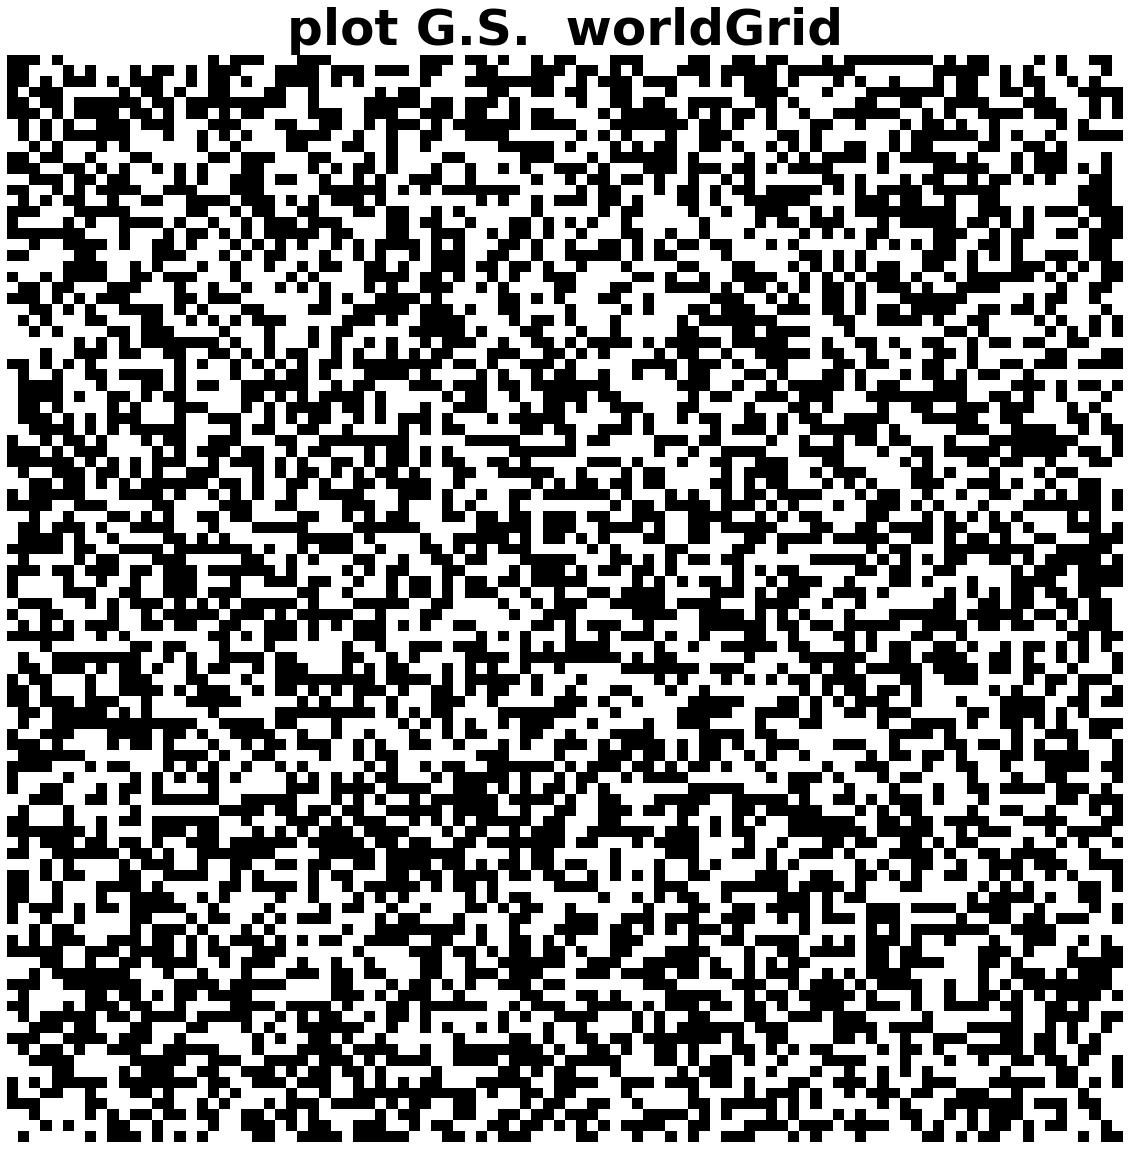

In [24]:
# Plot World Grid;
plotTitle = 'worldGrid'
plotGrayScale(worldGrid)

In [25]:
# Store Animation Frames;
TotalDuration_InNumberOfFrames = 1000
Frames = torch.zeros((TotalDuration_InNumberOfFrames, plotGridSize100, plotGridSize100))
worldGrid = torch.tensor(worldGrid.astype(int))[None, None, :, :]
filterGrid = torch.tensor(filterGrid.astype(int))[None, None, :, :]

In [26]:
# Time Animation?
n = convolutionAnimationFunction(worldGrid, filterGrid)

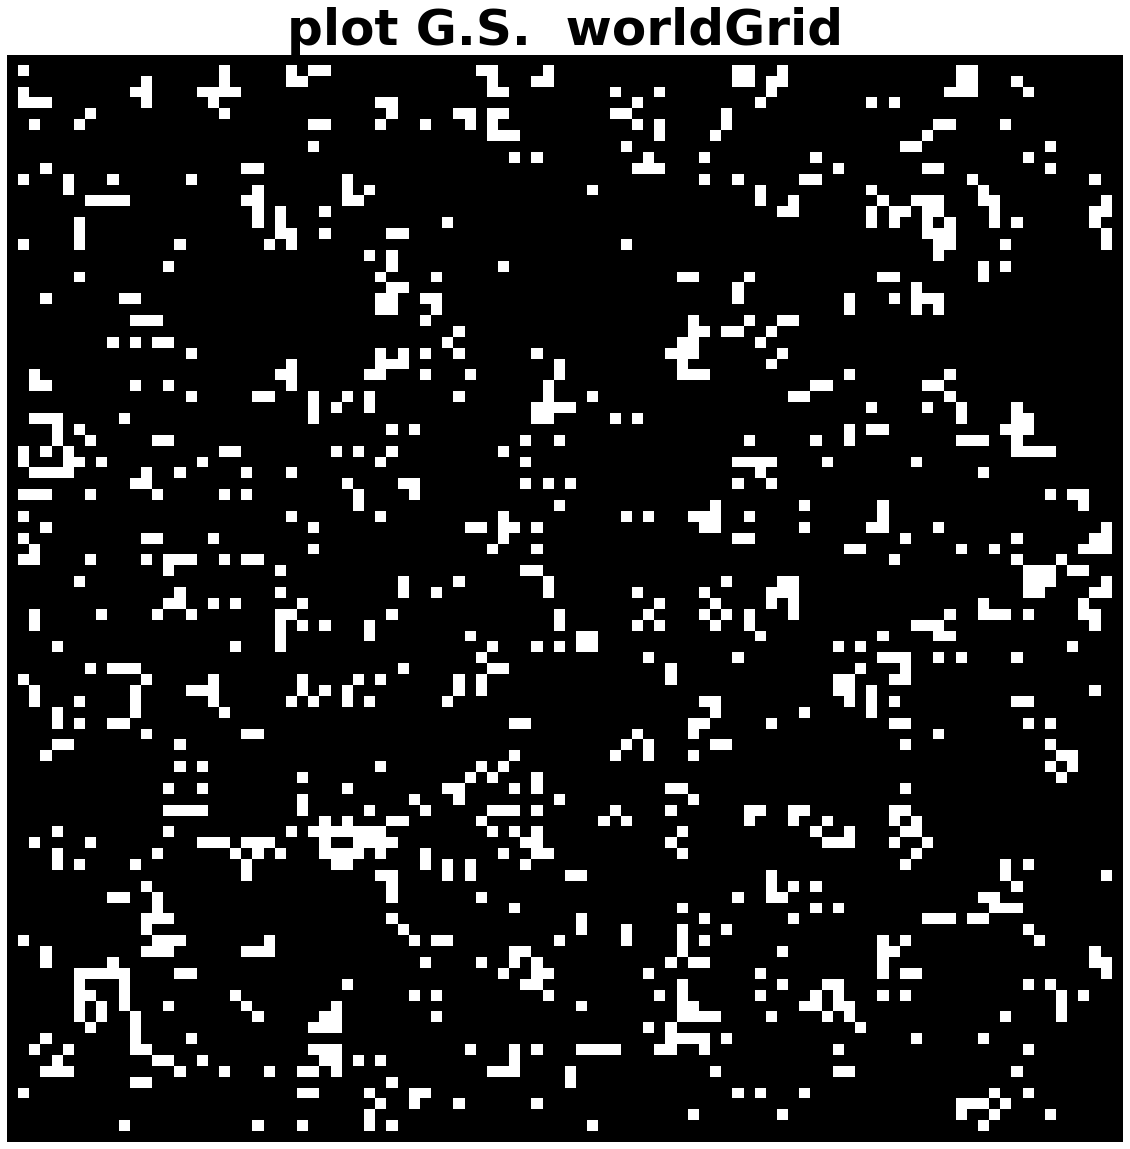

In [27]:
# Plot time?;
plotGrayScale((n == 2)[0, 0, :, :])

In [28]:
# For Loop For Convolution Animation Function;
for i in range(TotalDuration_InNumberOfFrames):

    n = convolutionAnimationFunction(worldGrid, filterGrid)
    
    worldGrid = (worldGrid * (n == 2)) + (n == 3)
    
    Frames[i] = worldGrid

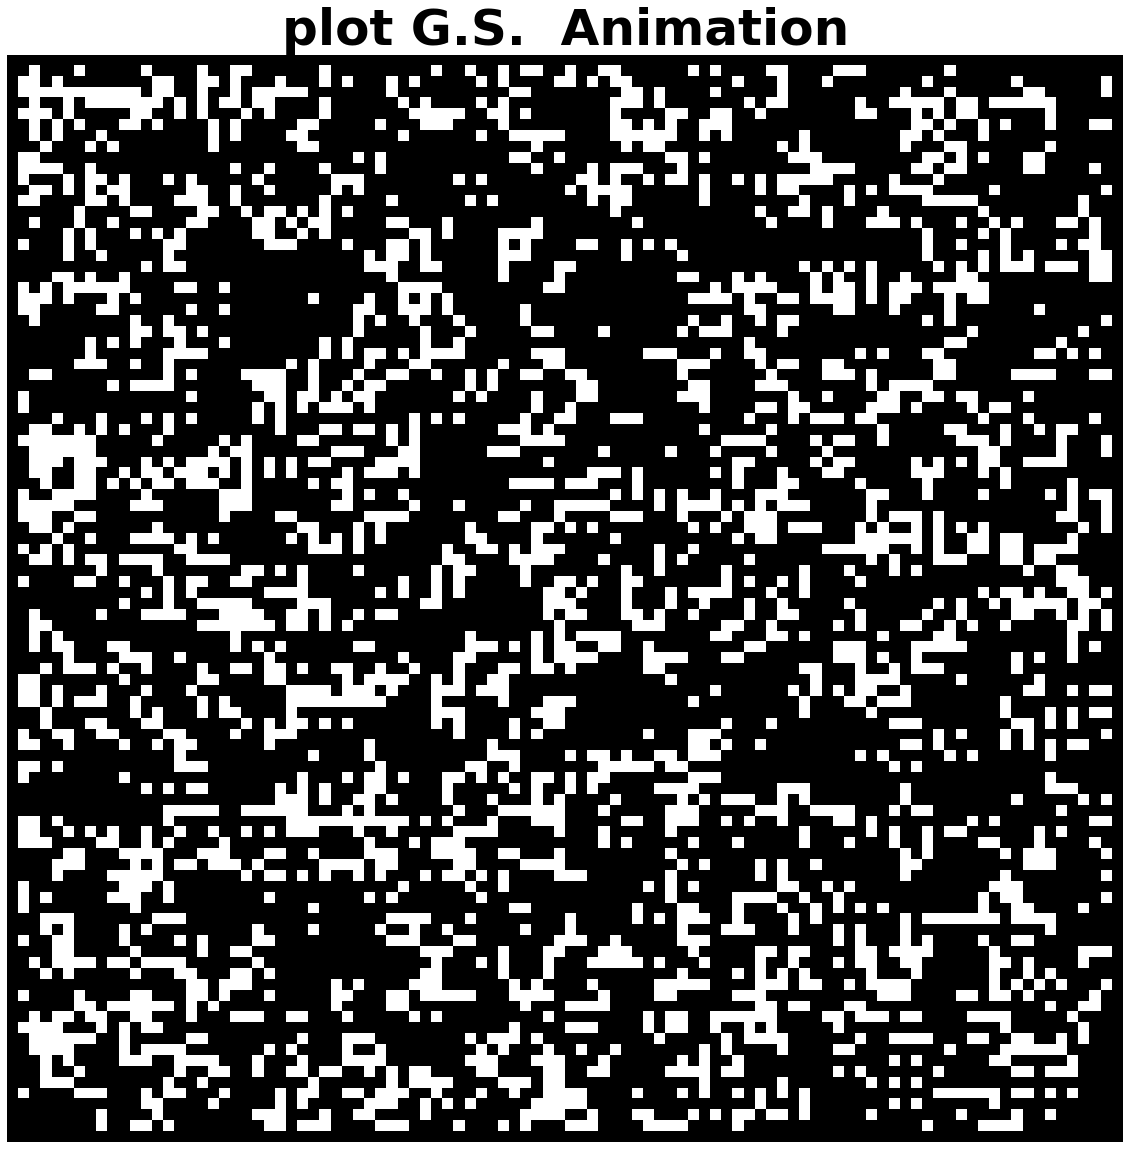

In [29]:
# Plot Animation;
plotTitle = 'Animation'
plotAnimation(Frames)